# Artificial Intelligence
# 464/664
# Assignment #3

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested, 
03. Each helper function should be preceeded by documentation (Markdown cell),
05. No comments in the code; anything worth mentioning should be included in the documentation,
06. Keep functions to 20 lines or less (including empty lines so do not add any),
08. Use descriptive variable names,
09. Functions should do only one thing,
10. Check submission deadline on Gradescope, 
11. Rename the file to Last_First_assignment_2, 
12. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
13. Do not submit any other files.


## Directions _not_ applicable for this Assignment:
* Do not use classes,
* Each helper function should be followed by three assert-style unit tests.


## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

# Problem #1: Multiagent Systems

## The World

A `List of Lists` is used to represent the world. Cells marked as '⬛' are obstacles in the world and are not traversable.

In [1]:
world = [
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬛','⬛','⬛','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜'],
['⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜','⬜']]

In [2]:
# A nicer view of the world, without commas and brackets
for row in world:
    print("".join(row))

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


## Robot

Our robot '🤖' starts at the bottom left and can either move up, down, left, or right. It's looking for the '❤️' in the world. 

In [3]:
MOVES = [(-1,0), (0,1), (1,0), (0,-1)] # Up Right Down Left

In [4]:
start = (len(world)-1, 0)

In [5]:
goal = (0, len(world)-1)

## Other Agents

There are four other agents in the world: '🚎', '🚎', '🚎', and '🚎'.

In [6]:
# Update the world with this information
world[start[0]][start[1]] = '🤖'
world[start[0]][start[1]+2] = '🚎'
world[start[0]][start[1]+4] = '🚎'
world[start[0]][start[1]+6] = '🚎'
world[start[0]][start[1]+8] = '🚎'
world[goal[0]][goal[1]] = '❤️'

In [7]:
# A nicer view of the world, without commas and brackets
for row in world:
    print("".join(row))

⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜❤️
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬛⬛⬛⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜
🤖⬜🚎⬜🚎⬜🚎⬜🚎⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜⬜


## Problem #1


'🤖' is your robot from Assignment #1 and uses the A$^*$ search function to find the optimal path to goal. Each '🚎' has no such capability; all it can do is swarm. Each '🚎' uses Boids Rules (repulsion and attraction only) with another '🚎' and '🤖'. Implement this multiagent system consisting of an intelligent '🤖' robot and four '🚎' agents. 

* Our A$^*$ robot '🤖' does not use Boids Rule, but is the de-facto leader of the swarm since the '🚎' agents swarm with it. 

* Print out the resulting view of the world ('🤖', '🚎', '⬛', and '❤️' icons) **for each step** '🤖' takes on its way to '❤️'. (Assignment #1 only asked for the final output. This assignment asks for a print of the world after each step taken by '🤖'.)

* Use a repulsion range of 2 and a suitable attraction range that keeps the swarm together.

* '🚎' shouldn't leave the world

* '🚎' locations may need to be rounded when placed on the world for printing

# Problem #2: Game Theory

We are designing an experiment where two players employ the *Best Response with Inertia* algorithm against each other.

## Best Response with Inertia Algorithm

Here is the outline of the algorithm for each player:


```
On day zero, play a random action

On day t, do one of two things:

    * With high probability, play the best response to what your opponent did yesterday, or
    * With low probability, be lazy and just do what you did yesterday.
```

## Game

The particular 2x2 game being played is the Stag-Hunt game, with the matrix:


|  | | |
|---|---|---|
|  | S | H |
| S | 3, 3 | 0, 2 |
| H | 2, 0 | 2, 2 |


Player 1 (P1) is the `row` player; Player 2 (P2) is the `col` player.

In [8]:
import random
import matplotlib.pyplot as plt

In [9]:
# The actions available to each player. Don't modify. 
actions_P1 = ['S', 'H']
actions_P2 = ['S', 'H']

# Store the history. Don't modify. 
history_P1_action, history_P1_utility = [], []
history_P2_action, history_P2_utility = [], []

<a id="get_utility"></a>
## get_utility

This function takes a joint action tuple and returns the utility for each player, packaged as a tuple. It is hardcoded for the Stag-Hunt game described above.

* **a** Tuple: joint action. a could be ('S', 'H'), for instance, which would signify that P1 has chosen to do 'S' and P2 has chosen to do 'H'.


**returns** 

* **utility** Tuple: the utility for each player as (utility of P1, utility of P2). For example, if the input is ('S', 'H'), the returned value is (0, 2) -- 0 for P1, 2 for P2. 

In [10]:
def get_utility(a):
    if a[0] == 'S' and a[1] == 'S':
        return (3, 3)
    elif a[0] == 'S' and a[1] == 'H':
        return (0, 2)
    elif a[0] == 'H' and a[1] == 'S':
        return (2, 0)
    elif a[0] == 'H' and a[1] == 'H':
        return (2, 2)

<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <p>
        TODO: Help players pick actions based on the <i>Best Response with inertia</i> algorithm described above (instead of just picking 'S' like they are now). 
    </p>
</div>

<a id="run_experiment"></a>
## run_experiment

This functions runs an experiment where two players play the Stag-Hunt game using the Best Response with Inertia algorithm.

* **num_trials** Int: The number of trials to run
* **num_days** Int: The number of days in each trial
* **debug** Bool: If set to True, statements are printed out


**returns** 

None

In [11]:
def run_experiment(num_trials, num_days, debug=True):
    if debug: print(f"Trial\tDay\tP1\tP2\n--------------------------")
    for trial in range(num_trials):  
        if debug: print(f"--------------------------")
        for day in range(num_days):
            
            # FIX 
            # Player should pick an action using the algorithm
            # Use 0.75 as stand-in for "high probability"             
            action_P1 = 'S' 
            action_P2 = 'S'
            
            # Don't modify below:
            utility_P1, utility_P2 = get_utility(tuple((action_P1, action_P2)))
            history_P1_action.append(action_P1)
            history_P2_action.append(action_P2)
            history_P1_utility.append(utility_P1)
            history_P2_utility.append(utility_P2)
            if debug: print(f"{trial}\t{day}\t{action_P1}\t{action_P2}")

In [12]:
# Parameters. Don't modify. Not even debug flag. 
run_experiment(num_trials=20, num_days=10, debug=True)

Trial	Day	P1	P2
--------------------------
--------------------------
0	0	S	S
0	1	S	S
0	2	S	S
0	3	S	S
0	4	S	S
0	5	S	S
0	6	S	S
0	7	S	S
0	8	S	S
0	9	S	S
--------------------------
1	0	S	S
1	1	S	S
1	2	S	S
1	3	S	S
1	4	S	S
1	5	S	S
1	6	S	S
1	7	S	S
1	8	S	S
1	9	S	S
--------------------------
2	0	S	S
2	1	S	S
2	2	S	S
2	3	S	S
2	4	S	S
2	5	S	S
2	6	S	S
2	7	S	S
2	8	S	S
2	9	S	S
--------------------------
3	0	S	S
3	1	S	S
3	2	S	S
3	3	S	S
3	4	S	S
3	5	S	S
3	6	S	S
3	7	S	S
3	8	S	S
3	9	S	S
--------------------------
4	0	S	S
4	1	S	S
4	2	S	S
4	3	S	S
4	4	S	S
4	5	S	S
4	6	S	S
4	7	S	S
4	8	S	S
4	9	S	S
--------------------------
5	0	S	S
5	1	S	S
5	2	S	S
5	3	S	S
5	4	S	S
5	5	S	S
5	6	S	S
5	7	S	S
5	8	S	S
5	9	S	S
--------------------------
6	0	S	S
6	1	S	S
6	2	S	S
6	3	S	S
6	4	S	S
6	5	S	S
6	6	S	S
6	7	S	S
6	8	S	S
6	9	S	S
--------------------------
7	0	S	S
7	1	S	S
7	2	S	S
7	3	S	S
7	4	S	S
7	5	S	S
7	6	S	S
7	7	S	S
7	8	S	S
7	9	S	S
--------------------------
8	0	S	S
8	1	S	S
8	2	S	S
8	3	S	S
8	4	S	S
8	5	S	S
8	6	S	S
8	7	S	S
8	8	S	S
8	

<a id="plot_results"></a>
## plot_results

This functions plots the results of an experiment using a bar chart.

* **history_P1_action** List[Str]: The history of Player 1's actions over the course of the experiment 
* **history_P2_action** List[Str]: The history of Player 2's actions over the course of the experiment 


**returns** 

None

In [13]:
def plot_results(history_P1_action, history_P2_action):
    labels = ['(S,S)', '(S,H)', '(H,S)', '(H,H)']
    cell_counts = [0, 0, 0, 0]
    for i in range(len(history_P1_action)):
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'S':
            cell_counts[0]+=1
        if history_P1_action[i] == 'S' and history_P2_action[i] == 'H':
            cell_counts[1]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'S':
            cell_counts[2]+=1
        if history_P1_action[i] == 'H' and history_P2_action[i] == 'H':
            cell_counts[3]+=1
    plt.bar(labels, cell_counts)
    plt.show()

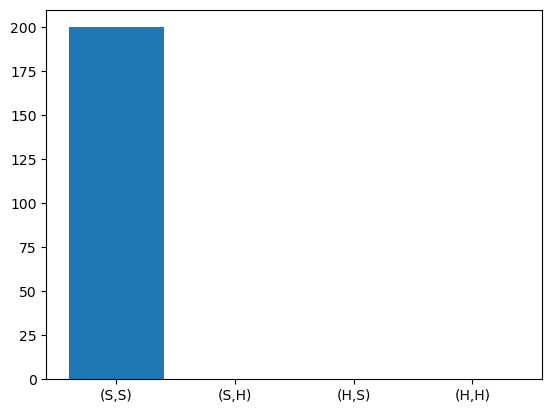

In [14]:
# Visualize the results. Don't modify. 
plot_results(history_P1_action, history_P2_action)

| Question | Response | 
|------|------|
|Where do agents get spend most of their time? | Choose one (leave your choice here and remove the other two choices): 
* Mostly (S,S)
* Mostly (H,H)
* Roughly 50-50 between (S,S) and (H,H)

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".